# 27 Oscillators Coupled by Delayed Pulses

### Delta of 0.1

Initial values for cell A and B, delay(delta) and simulation set-up

In [37]:
delta=0.1
phi_A=0
phi_B=0.9        
t_A_to_B=delta          
t_B_to_A=float('inf')              
t_present=0              
t_final=20              

num_spikes_A=1
num_spikes_B=0
t_spikes_A=[0]
t_spikes_B=[]

Define g and f functions:

In [38]:
def g(phi):
    e=1/3
    return e*phi*(1-phi)


def f(phi):
    return phi + g(phi)

We run the simulation:

In [39]:
while t_present<t_final:
    T_vec=[1-phi_A,1-phi_B,t_A_to_B,t_B_to_A]
    T_0=min(T_vec)           
    done=0
   
    if T_0==1-phi_A:
        phi_B=phi_B+1-phi_A
        t_B_to_A=t_B_to_A-(1-phi_A)
        t_A_to_B=delta
        t_present=t_present+1-phi_A
        num_spikes_A=num_spikes_A+1
        t_spikes_A.append(t_present)
        phi_A=0
        done=1
   
    if T_0==1-phi_B and done==0:
        phi_A=phi_A+1-phi_B
        t_A_to_B=t_A_to_B-(1-phi_B)
        t_B_to_A=delta
        t_present=t_present+1-phi_B
        num_spikes_B=num_spikes_B+1
        t_spikes_B.append(t_present)
        phi_B=0
        done=1
   
    if T_0==t_A_to_B and done==0:
        phi_B=f(phi_B+t_A_to_B)
        phi_A=phi_A+t_A_to_B
        t_B_to_A=t_B_to_A-t_A_to_B
        t_present=t_present+t_A_to_B
        t_A_to_B=float('inf')
        done=1
   
    if T_0==t_B_to_A and done==0:
        phi_A=f(phi_A+t_B_to_A)
        phi_B=phi_B+t_B_to_A
        t_A_to_B=t_A_to_B-t_B_to_A
        t_present=t_present+t_B_to_A
        t_B_to_A=float('inf')
        done=1   

Preserve cell A and B spike trains from first experiment (placeholder names for plotting later)

In [40]:
firstA=t_spikes_A
firstB=t_spikes_B
spikesA=num_spikes_A
spikesB=num_spikes_B

### Delta of 0.7

In [41]:
delta=0.7
phi_A=0
phi_B=0.9        
t_A_to_B=delta          
t_B_to_A=float('inf')              
t_present=0              
t_final=20              

num_spikes_A=1
num_spikes_B=0
t_spikes_A=[0]
t_spikes_B=[]

In [42]:
while t_present<t_final:
    T_vec=[1-phi_A,1-phi_B,t_A_to_B,t_B_to_A]
    T_0=min(T_vec)           
    done=0
   
    if T_0==1-phi_A:
        phi_B=phi_B+1-phi_A
        t_B_to_A=t_B_to_A-(1-phi_A)
        t_A_to_B=delta
        t_present=t_present+1-phi_A
        num_spikes_A=num_spikes_A+1
        t_spikes_A.append(t_present)
        phi_A=0
        done=1
   
    if T_0==1-phi_B and done==0:
        phi_A=phi_A+1-phi_B
        t_A_to_B=t_A_to_B-(1-phi_B)
        t_B_to_A=delta
        t_present=t_present+1-phi_B
        num_spikes_B=num_spikes_B+1
        t_spikes_B.append(t_present)
        phi_B=0
        done=1
   
    if T_0==t_A_to_B and done==0:
        phi_B=f(phi_B+t_A_to_B)
        phi_A=phi_A+t_A_to_B
        t_B_to_A=t_B_to_A-t_A_to_B
        t_present=t_present+t_A_to_B
        t_A_to_B=float('inf')
        done=1
   
    if T_0==t_B_to_A and done==0:
        phi_A=f(phi_A+t_B_to_A)
        phi_B=phi_B+t_B_to_A
        t_A_to_B=t_A_to_B-t_B_to_A
        t_present=t_present+t_B_to_A
        t_B_to_A=float('inf')
        done=1   

Text(0.5,0.98,'Two Pulse Coupled Oscillators with Different Delays')

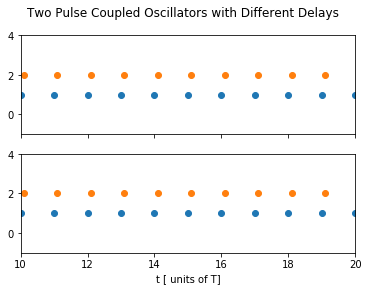

In [43]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(2,sharex=True, sharey=True,)

axs[0].plot(firstA,np.ones((spikesA,1)),'o')
axs[0].plot(firstB,2*np.ones((spikesB,1)),'o')

axs[1].plot(t_spikes_A,np.ones((num_spikes_A,1)),'o')
axs[1].plot(t_spikes_B,2*np.ones((num_spikes_B,1)),'o')

plt.ylim([-1,4])
plt.xlim([10,20])
plt.xlabel('t [ units of T]')
fig.suptitle('Two Pulse Coupled Oscillators with Different Delays')


The top figure has a delay of 0.1 while the bottom figure has a delay of 0.7